# Analyse de l'ampleur et du développement des violences sexuelles en France.

## Pré-traitement des données

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#pour l'automatisation, on enregistre le chemin dans une varibale de manière à pouvoir changer le chemin facilement
path_to_file = './Données/tableaux-4001-ts.xlsx'

In [18]:
#importation des données
#feuille 1 : france_entière
df = pd.read_excel(path_to_file, sheet_name=0)
df.head(2)

,Index,libellé index,_2021_09,_2021_08,_2021_07,_2021_06,_2021_05,_2021_04,_2021_03,_2021_02,...,_2000_10,_2000_09,_2000_08,_2000_07,_2000_06,_2000_05,_2000_04,_2000_03,_2000_02,_2000_01
0,1,Règlements de compte entre malfaiteurs,12,15,11,8,6,4,13,7,...,8,8,6,5,12,5,2,9,5,11
1,2,Homicides pour voler et à l'occasion de vols,4,1,3,5,5,3,4,1,...,3,4,9,5,4,4,7,6,5,2


In [21]:
#on prépare les données pour la transposition lignes/colonnes qu'on effectue après
#il faut résoudre le problème du double index
#pandas.DataFrame.set_index() définira la colonne passée en argument comme l’index de la DataFrame en surchargeant l’index initial.
#on utilise le libellé comme index
df.set_index('libellé index', inplace = True)
df.drop(columns = ['Index'], inplace = True)
df.head()

,_2021_09,_2021_08,_2021_07,_2021_06,_2021_05,_2021_04,_2021_03,_2021_02,_2021_01,_2020_12,...,_2000_10,_2000_09,_2000_08,_2000_07,_2000_06,_2000_05,_2000_04,_2000_03,_2000_02,_2000_01
libellé index,,,,,,,,,,,,,,,,,,,,,
Règlements de compte entre malfaiteurs,12,15,11,8,6,4,13,7,6,10,...,8,8,6,5,12,5,2,9,5,11
Homicides pour voler et à l'occasion de vols,4,1,3,5,5,3,4,1,0,4,...,3,4,9,5,4,4,7,6,5,2
Homicides pour d'autres motifs,68,73,76,89,84,67,70,49,85,86,...,84,82,74,75,62,77,76,70,96,60
Tentatives d'homicides pour voler et à l'occasion de vols,6,14,11,14,14,10,9,8,6,15,...,14,5,8,10,14,14,5,9,10,7
Tentatives homicides pour d'autres motifs,275,301,267,317,256,243,241,258,236,267,...,87,95,68,101,85,106,63,104,91,65


In [22]:
#on permute les lignes et colonnes
df_trans = df.transpose()
df_trans.head(3)

libellé index,Règlements de compte entre malfaiteurs,Homicides pour voler et à l'occasion de vols,Homicides pour d'autres motifs,Tentatives d'homicides pour voler et à l'occasion de vols,Tentatives homicides pour d'autres motifs,Coups et blessures volontaires suivis de mort,Autres coups et blessures volontaires criminels ou correctionnels,Prises d'otages à l'occasion de vols,Prises d'otages dans un autre but,Sequestrations,...,"Banqueroutes, abus de biens sociaux et autres délits de société",Index non utilisé,Index non utilisé,"Prix illicittes, publicité fausse et infractions aux règles de la concurrence",Achats et ventes sans factures,Infractions à l'exercice d'une profession règlementée,Infractions au droit de l'urbanisme et de la construction,Fraudes fiscales,Autres délits économiques et financiers,Autres délits
_2021_09,12,4,68,6,275,18,30662,11,11,449,...,120,0,0,105,5,98,455,71,1478,14650
_2021_08,15,1,73,14,301,6,27345,4,17,385,...,70,0,0,80,5,92,363,36,1334,13162
_2021_07,11,3,76,11,267,23,28377,9,12,364,...,114,0,0,91,4,105,428,53,1264,13487


In [51]:
#selectionner les colonnes avec les index correspondant aux infractions sexuelles (index 46 à 50)
df_sex = df_trans.iloc[:, 45:50]
df_sex.head()

libellé index,Viols sur des majeur(e)s,Viols sur des mineur(e)s,Harcèlements sexuels et autres agressions sexuelles contre des majeur(e)s,Harcèlements sexuels et autres agressions sexuelles contre des mineur(e)s,Atteintes sexuelles
_2021_09,1622,1473,1546,2253,1345
_2021_08,1400,1257,1349,1675,1184
_2021_07,1498,1394,1461,1880,1243
_2021_06,1615,1789,1590,2564,1451
_2021_05,1273,1410,1196,2050,1285


In [60]:
#ajout d'un index
df_sex.reset_index(inplace = True)
df_sex.head()

libellé index,Index,Viols sur des majeur(e)s,Viols sur des mineur(e)s,Harcèlements sexuels et autres agressions sexuelles contre des majeur(e)s,Harcèlements sexuels et autres agressions sexuelles contre des mineur(e)s,Atteintes sexuelles
0,_2021_09,1622,1473,1546,2253,1345
1,_2021_08,1400,1257,1349,1675,1184
2,_2021_07,1498,1394,1461,1880,1243
3,_2021_06,1615,1789,1590,2564,1451
4,_2021_05,1273,1410,1196,2050,1285


In [58]:
#vérifier que les colonnes correspondent aux cinq infractions
print(list(df_sex.columns))

['Viols sur des majeur(e)s', 'Viols sur des mineur(e)s', 'Harcèlements sexuels et autres agressions sexuelles contre des majeur(e)s', 'Harcèlements sexuels et autres agressions sexuelles contre des mineur(e)s', 'Atteintes sexuelles']


In [63]:
df_sex = df_sex.rename(columns = {'Index':'Année_mois'})
df_sex.index.rename('Index', inplace=True)
df_sex.head()

libellé index,Année_mois,Viols sur des majeur(e)s,Viols sur des mineur(e)s,Harcèlements sexuels et autres agressions sexuelles contre des majeur(e)s,Harcèlements sexuels et autres agressions sexuelles contre des mineur(e)s,Atteintes sexuelles
Index,,,,,,
0,_2021_09,1622,1473,1546,2253,1345
1,_2021_08,1400,1257,1349,1675,1184
2,_2021_07,1498,1394,1461,1880,1243
3,_2021_06,1615,1789,1590,2564,1451
4,_2021_05,1273,1410,1196,2050,1285


In [64]:
#supprimer le tiret bas devant la date
df_sex['Année_mois'] = df_sex['Année_mois'].str[1:]

In [65]:
#créer deux nouvelles colonnes pour l'année et le mois
df_sex['Année'] = df_sex['Année_mois'].str[:4]
df_sex['Mois'] = df_sex['Année_mois'].str[5:]
df_sex

libellé index,Année_mois,Viols sur des majeur(e)s,Viols sur des mineur(e)s,Harcèlements sexuels et autres agressions sexuelles contre des majeur(e)s,Harcèlements sexuels et autres agressions sexuelles contre des mineur(e)s,Atteintes sexuelles,Année,Mois
Index,,,,,,,,
0,2021_09,1622,1473,1546,2253,1345,2021,09
1,2021_08,1400,1257,1349,1675,1184,2021,08
2,2021_07,1498,1394,1461,1880,1243,2021,07
3,2021_06,1615,1789,1590,2564,1451,2021,06
4,2021_05,1273,1410,1196,2050,1285,2021,05
...,...,...,...,...,...,...,...,...
256,2000_05,287,513,407,904,997,2000,05
257,2000_04,231,414,321,727,785,2000,04
258,2000_03,271,513,402,766,874,2000,03


In [75]:
#exportation des données dans un fichier csv
df_sex.to_csv('./generated/data_sex.csv', index = False)

## Premières visualisations

In [78]:
df_sex = pd.read_csv('generated/data_sex.csv')

In [87]:
df_years = df_sex.drop(columns = ['Mois'])

Text(0.5, 1.0, "Évolution du nombre d'évènement par année")

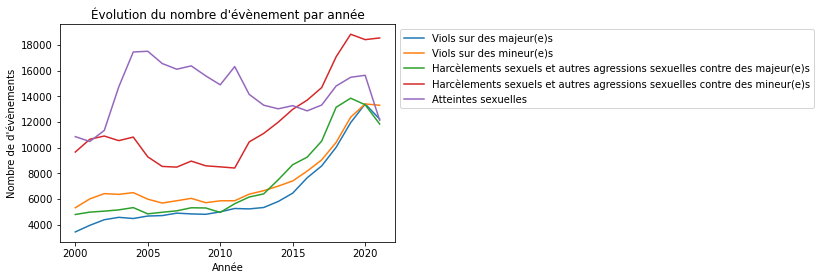

In [88]:
#visualiser le nombre d'infractions par années
df_years.groupby('Année').sum().plot()

plt.legend(bbox_to_anchor=(1.0, 1.0)) #mettre la légende hors du plot
plt.ylabel("Nombre de d'évènements")
plt.title("Évolution du nombre d'évènement par année")